# <center>第02讲实验&emsp;强化学习环境的安装及使用</center>
&emsp;&emsp;深度强化学习技术将具有感知能力的深度学习和具有决策能力的强化学习相结合，以形成直接从输入原始数据到输出动作控制的完整智能系统。因此对于从事深度强化学习研究的相关工作人员而言，选择一个好的工具势必会事半功倍。PyTorch是Facebook公司在深度学习框架Torch基础上，使用Python重写的一个全新的框架。它不仅继承了NumPy的众多优点，还支持GPUs计算。另外PyTorch还拥有丰富的API，可以快速完成深度神经网络模型的搭建和训练。因此，PyTorch无疑是目前深度强化学习的最好选择。本章将讲解PyTorch与其他工具相比所具有的优点以及使用PyTorch所必须的环境安装及使用。为了更方便快捷地构建、模拟、渲染和实验强化学习算法，本书使用了Gym等环境平台，对于这些平台，本章也阐述了安装及常用的使用方法。

# 1. Anaconda、Jupyter notebook环境的测试
### 测试一：绘制曲线

<ipython-input-4-d3089ad3f0fe>:7: RuntimeWarning: invalid value encountered in log
  y=1/100*x**4-8/300*x**3-3+np.log(x)


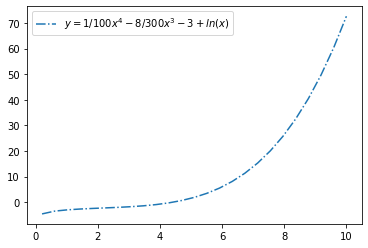

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def trans(x):
    
    y=1/100*x**4-8/300*x**3-3+np.log(x)
    return y

x=np.linspace(-10,10,50)
y=trans(x)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(x,y,ls='-.',label='$y=1/100x^4-8/300x^3-3+ln(x)$')
plt.legend()
plt.show()
#fig.savefig('r5.png')

### 测试二：散点分类 

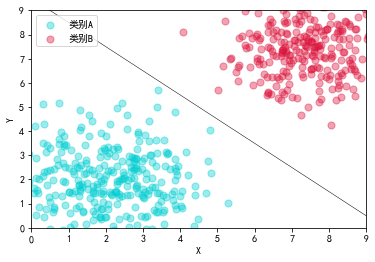

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#matplotlib画图中中文显示会有问题，需要这两行设置默认字体
 
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xmax=9,xmin=0)
plt.ylim(ymax=9,ymin=0)
#画两条（0-9）的坐标轴并设置轴标签x，y
 
x1 = np.random.normal(2,1.2,300) # 随机产生300个平均值为2，方差为1.2的浮点数，即第一簇点的x轴坐标
y1 = np.random.normal(2,1.2,300) # 随机产生300个平均值为2，方差为1.2的浮点数，即第一簇点的y轴坐标
x2 = np.random.normal(7.5,1.2,300)
y2 = np.random.normal(7.5,1.2,300)  
colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'
area = np.pi * 4**2  # 点面积 
# 画散点图
plt.scatter(x1, y1, s=area, c=colors1, alpha=0.4, label='类别A')
plt.scatter(x2, y2, s=area, c=colors2, alpha=0.4, label='类别B')
plt.plot([0,9.5],[9.5,0],linewidth = '0.5',color='#000000')
plt.legend()
#plt.savefig(r'C:\Users\jichao\Desktop\大论文\12345svm.png', dpi=300)
plt.show()

# 2. PyTorch环境的测试

In [6]:
import torch
a = torch.Tensor([[2,3], [4,5], [7,8]])
print('a is : {}'.format(a))
print('a size is {}'.format(a.size()))

a is : tensor([[2., 3.],
        [4., 5.],
        [7., 8.]])
a size is torch.Size([3, 2])


# 3. PyTorch环境的测试

## 3.1 Gym环境
&emsp;&emsp;前面我们介绍了gym的安装，使用下面代码可以简单的使用gym环境。<br>
&emsp;&emsp;import gym<br>
&emsp;&emsp;env = gym.make('MountainCar-v0')<br>
&emsp;&emsp;env.reset()<br>
&emsp;&emsp;env.render()<br>
&emsp;&emsp;env.close()<br>
&emsp;&emsp;如果想看看别的环境是什么样子的，可以将MountainCar-v0替换成CartPole-v0, Pendulum-v0，Acrobot-v1等，这些环境都来自Env基类。<br>


In [7]:
import gym
import sys
env = gym.make('MountainCar-v0')
env.reset()
for _ in range(100):
    env.render()
env = gym.make('CartPole-v0')
env.reset()
for _ in range(100):
    env.render()
env = gym.make('Pendulum-v0')
env.reset()
for _ in range(100):
    env.render()
env = gym.make('Acrobot-v1')
env.reset()
for _ in range(100):
    env.render()

env.close()

Exception ignored in: <function Viewer.__del__ at 0x00000265E8E9A040>
Traceback (most recent call last):
  File "f:\苏州大学\课程\强化学习\gym\gym\envs\classic_control\rendering.py", line 165, in __del__
    self.close()
  File "f:\苏州大学\课程\强化学习\gym\gym\envs\classic_control\rendering.py", line 83, in close
    self.window.close()
  File "E:\Anaconda\Anaconda\envs\rl\lib\site-packages\pyglet\window\win32\__init__.py", line 319, in close
    super(Win32Window, self).close()
  File "E:\Anaconda\Anaconda\envs\rl\lib\site-packages\pyglet\window\__init__.py", line 838, in close
    app.windows.remove(self)
  File "E:\Anaconda\Anaconda\envs\rl\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: <weakref at 0x00000265E8E81A40; to 'Win32Window' at 0x00000265E3E89FA0>


&emsp;&emsp;Mountain-Car小车登山案例详解<br>
&emsp;&emsp;环境描述：小车的轨迹是一维的，定位在两山之间，目标是爬上右边山顶的小黄旗处。但小车的发动机不足以一次性攀登到山顶，采取的方式是小车来回摆动增加动量。<br>
&emsp;&emsp;动作：包括3个动作，分别是向前、不动、向后。<br>
&emsp;&emsp;状态：是2维的，分别是位置position和速度velocity。position的取值范围为[-1.2, 0.6]，最左边坡顶为-1.2，小黄旗位置为0.5。<br>
&emsp;&emsp;奖励：每次移动都会得到-1的奖励，直到小车开到黄旗位置。<br>
&emsp;&emsp;针对Mountain-Car的Gym环境，程序如下所示：<br>
<br>


In [3]:
import gym                                    # 引入环境   
env = gym.make('MountainCar-v0')              # 创建MountainCar-v0环境。
for episode in range(2):
    env.reset()                               # 重置智能体状态<br>
    print("Episode finished after {} timesteps".format(episode))
    for _ in range(500):                       # 进行1000次迭代
        env.render()                          # 渲染
        observation, reward, down, info = env.step(env.action_space.sample())   # 执行动作。env.action_space.sample()是随机动作选择
env.close()                                   # 关闭环境

Episode finished after 0 timesteps
Episode finished after 1 timesteps


&emsp;&emsp;运行代码显示如图1所示的小车爬山过程：<br>
<center><img src='./image/图1.png' width='275'></center>
<center>图1&ensp; Gym环境下的小车爬山图</center><br>
&emsp;&emsp;对部分行代码进行说明：<br>
&emsp;&emsp;第1行：导入Gym环境。Gym库的核心是使用Env对象作为统一的环境接口，所有Env对象或是用户自定义的环境对象，包括类成员函数seed( )、step( )、reset( )和render( )。<br>
&emsp;&emsp;第2行：创建MountainCar环境。make( )的参数用于设置待创建的环境名称，在Gym中有MountainCar，Acrobot，Pendulum，CartPole等4个自带的环境。其文件均存放于：自定义Gym目录/envs/classic_control文件夹下，此外用户也可以自定义环境。<br>
&emsp;&emsp;第3行：设置情节数目。在训练参数时，Agent需要执行多个情节，每次到达终止状态时，便完成了一个情节，并开启下个情节。<br>
&emsp;&emsp;第4行：在开始或一个情节完成时，重置Agent状态。<br>
&emsp;&emsp;第6行：设置在一个情节中执行的步数。<br>
&emsp;&emsp;第7、8行：小车随机选择动作执行，并渲染图像。 <br>
&emsp;&emsp;下面以MountainCar环境类为例，阐述Gym环境中常见的3个函数。<br>
&emsp;&emsp;（1）reset()函数<br>
&emsp;&emsp;在强化学习中，训练参数时，Agent会执行多个情节，积累经验。然后在经验中选取回报高的动作。当Agent达到终止状态时，称之为一个情节或者一条轨迹。Agent到达终止状态，准备开启下个情节时，Agent将需要重新回到初始状态，初始化Agent的状态和其他一些必要的初始化操作。这个功能由环境类的reset()函数实现。<br>
&emsp;&emsp;（2）render()函数<br>
&emsp;&emsp;任意一个模拟仿真环境，都存在物理引擎和图像引擎两部分。物理引擎模拟环境中的物理规律，图像引擎用来直观显示环境中的图像。对于强化学习，可以不用图像引擎，只是利用物理引擎训练参数。但是为了直观的显示当前Agent在环境中的具体状态以及方便调试代码，图像引擎是必不可少的。而render()函数在Gym环境中就起到图像引擎的作用。<br>
&emsp;&emsp;（3）step()函数<br>
&emsp;&emsp;step()函数在强化学习平台中极为重要，在模拟仿真环境中起到物理引擎的作用。需要输入的参数是当前的状态，待执行的动作。返回的是下一步的状态、立即奖赏以及是否终止。它体现了Agent与环境交互的整个过程，包含了与环境交互的所有信息。<br>

&emsp;&emsp;（1）空间<br>
&emsp;&emsp;包括:动作空间：action_space和状态空间：observation_space。<br>
&emsp;&emsp;&emsp;&emsp;动作有3个动作：向前、向后和不动；<br>
&emsp;&emsp;&emsp;&emsp;状态为2维，位置position和速度velocity，[position,velocity]。position的值在最低点处为-0.5左右，最左边的位置为-1.2，最右边的位置为0.6。<br>

In [2]:
import gym
env = gym.make('MountainCar-v0')
print(env.action_space)
print(env.observation_space)

Discrete(3)
Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


In [15]:
print(env.observation_space.high)
#> array([ 2.4       ,         inf,  0.20943951,         inf])
print(env.observation_space.low)
#> array([-2.4       ,        -inf, -0.20943951,        -inf])

[0.6  0.07]
[-1.2  -0.07]


## 3.2 关闭Gym环境窗口
&emsp;&emsp;程序在运行过程中，当使用Ctrl+C或点击ipytion右上角的“停止”按钮时，会弹出Windows的调试窗口，然后ipython也会崩掉。具体解决办法是：在env.render()前添加一个中断，定义一个函数处理这个信号。

In [1]:
import gym

import signal
import sys

def CtrlCHandler(signum, frame):
    env.close()
    sys.exit(0)

# box2d任务
env = gym.make('BipedalWalker-v3')

#atari经典任务
# env = gym.make('Asterix-ram-v0')

# 经典任务
# env = gym.make('Pendulum-v0')
 
for i_episode in range(100):
    env.reset()
    for t in range(100):
        signal.signal(signal.SIGINT, CtrlCHandler)
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
quit()

f:\苏州大学\课程\强化学习\gym\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
Episode finished after 88 timesteps
Episode finished after 96 timesteps
Episode finished after 68 timesteps
Episode finished after 84 timesteps
Episode finished after 80 timesteps
Episode finished after 94 timesteps
Episode finished after 78 timesteps
Episode finished after 74 timesteps
Episode finished after 64 timesteps
Episode finished after 82 timesteps
Episode finished after 71 timesteps
Episode finished after 91 timesteps
Episode finished after 78 timesteps
Episode finished after 48 timesteps
Episode finished after 52 timesteps
Episode finished after 51 timesteps
Episode finished after 76 timesteps
Episode finished after 40 timesteps
Episode finished after 62 timesteps
Episode finished after 88 timesteps
Episode finished after 87 timesteps
Episode finished after 73 timesteps
Episode finished after 66 timestep

SystemExit: 0

In [18]:
import gym
print(gym.envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

In [3]:
import gym
env = gym.make('Seaquest-v0')
#env = gym.make('FetchPickAndPlace-v1')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

FileNotFoundError: Could not find module 'E:\Anaconda\Anaconda\envs\rl\lib\site-packages\atari_py\ale_interface\ale_c.dll' (or one of its dependencies). Try using the full path with constructor syntax.

## 3.3 搭建扫地机器人的Gym环境
&emsp;&emsp;为了更好地阐述机器学习算法，为后续章节提供一个简单的实验环境，本节利用Gym搭建一个扫地机器人环境。该环境描述如下：在一个5 $\times$ 5的扫地机器人环境中，有一个垃圾和一个充电桩，到达[5,4]处机器人捡到垃圾，并结束游戏，同时获得+5的奖赏；左下角[1,1]处有一个充电桩，机器人到达充电桩可以充电，且不再行走，获得+1的奖赏。环境中间[3,3]处有一个障碍物，机器人无法通过。扫地机器人整体结构如图2.19所示。<br>
<center><img src='./image/图2.19.png' width='275'></center>
<center>图2.&ensp; 扫地机器人整体结构</center>
&emsp;&emsp;扫地机器人具体流程如下：<br>
&emsp;&emsp;（1）每局游戏开始，机器人初始位置位于左上角，即[1,5]处。<br>
&emsp;&emsp;（2）游戏进行过程中，机器人将在地图上不断进行探索。<br>
&emsp;&emsp;（3）机器人遇到障碍物位时无法通过，保持原地不动，获得-10的奖赏。<br>
&emsp;&emsp;（4）迷宫地图有两个终止状态。一个为捡到垃圾，获得+5的奖赏；另一个为达到充电桩进行充电，获得+1奖赏。<br>
&emsp;&emsp;（5）扫地机器人到达终止状态，即一个情节结束，机器人回到初始位置。<br>

In [4]:
import math
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np

class Grid(object):
    def __init__(self, x:int = None,
                       y:int = None,
                       type:int = 0,
                       reward:float = 0.0):
        self.x = x                          # 坐标x
        self.y = y
        self.type = type                    # 类别值（0：空；1：障碍或边界）
        self.reward = reward                # 该格子的即时奖励
        self.name = None                    # 该格子的名称
        self._update_name()

    def _update_name(self):
        self.name = "X{0}-Y{1}".format(self.x, self.y)

    def __str__(self):
        return "name:{4}, x:{0}, y:{1}, type:{2}".format(self.x,
                                                                    self.y,
                                                                    self.type,
                                                                    self.name
                                                                    )

class GridMatrix(object):
    def __init__(self, n_width:int,                 # 水平方向格子数
                       n_height:int,                # 竖直方向格子数
                       default_type:int = 0,        # 默认类型
                       default_reward:float = 0.0,  # 默认即时奖励值
                       ):
        self.grids = None
        self.n_height = n_height
        self.n_width = n_width
        self.len = n_width * n_height
        self.default_reward = default_reward
        self.default_type = default_type
        self.reset()

    def reset(self):
        self.grids = []
        for x in range(self.n_height):
            for y in range(self.n_width):
                self.grids.append(Grid(x,
                                       y,
                                       self.default_type,
                                       self.default_reward))

    def get_grid(self, x, y=None):
        '''获取一个格子信息
        args:坐标信息，由x，y表示或仅有一个类型为tuple的x表示
        return:grid object
        '''
        xx, yy = None, None
        if isinstance(x, int):
            xx, yy = x, y
        elif isinstance(x, tuple):
            xx, yy = x[0], x[1]
        assert(xx >= 0 and yy >= 0 and xx < self.n_width and yy < self.n_height), "任意坐标值应在合理区间"
        index = yy * self.n_width + xx
        return self.grids[index]

    def set_reward(self, x, y, reward):
        grid = self.get_grid(x, y)
        if grid is not None:
            grid.reward = reward
        else:
            raise("grid doesn't exist")

    def set_type(self, x, y, type):
        grid = self.get_grid(x, y)
        if grid is not None:
            grid.type = type
        else:
            raise("grid doesn't exist")

    def get_reward(self, x, y):
        grid = self.get_grid(x, y)
        if grid is None:
            return None
        return grid.reward


    def get_type(self, x, y):
        grid = self.get_grid(x, y)
        if grid is None:
            return None
        return grid.type


class GridWorldEnv(gym.Env):

    metadata = {
        'render.modes': ['human', 'rgb_array'],
        'video.frames_per_second': 30
    }

    def __init__(self, n_width: int=5,
                       n_height: int = 5,
                       u_size=40,
                       default_reward: float = 0,
                       default_type=0):
        self.u_size = u_size                        # 当前格子绘制尺寸
        self.n_width = n_width                      # 格子世界宽度（以格子数计）
        self.n_height = n_height                    # 高度
        self.width = u_size * n_width               # 场景宽度 screen width
        self.height = u_size * n_height             # 场景长度
        self.default_reward = default_reward
        self.default_type = default_type

        self.grids = GridMatrix(n_width=self.n_width,
                                n_height=self.n_height,
                                default_reward=self.default_reward,
                                default_type=self.default_type)
        self.reward = 0                             # for rendering
        self.action = None                          # for rendering

        # 0,1,2,3 represent left, right, up, down
        self.action_space = spaces.Discrete(4)
        # 观察空间由low和high决定
        self.observation_space = spaces.Discrete(self.n_height * self.n_width)

        self.ends = [(0, 0), (4, 3)]  # 终止格子坐标，可以有多个
        self.start = (0, 4)  # 起始格子坐标，只有一个
        self.types = [(2, 2, 1)]
        self.rewards = [(0, 0, 1), (4, 3, 5), (2, 2, -10)]
        self.refresh_setting()
        self.viewer = None  # 图形接口对象
        self.seed()  # 产生一个随机子
        self.reset()

    def seed(self, seed=None):
        # 产生一个随机化时需要的种子，同时返回一个np_random对象，支持后续的随机化生成操作
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action), "%r (%s) invalid" % (action, type(action))
        self.action = action                        # action for rendering
        old_x, old_y = self._state_to_xy(self.state)
        new_x, new_y = old_x, old_y

        if action == 0: new_x -= 1  # left
        elif action == 1: new_x += 1  # right
        elif action == 2: new_y += 1  # up
        elif action == 3: new_y -= 1  # down
        elif action == 4: new_x, new_y = new_x - 1, new_y - 1
        elif action == 5: new_x, new_y = new_x + 1, new_y - 1
        elif action == 6: new_x, new_y = new_x + 1, new_y - 1
        elif action == 7: new_x, new_y = new_x + 1, new_y + 1
        # boundary effect
        if new_x < 0: new_x = 0
        if new_x >= self.n_width: new_x = self.n_width - 1
        if new_y < 0: new_y = 0
        if new_y >= self.n_height: new_y = self.n_height - 1

        # wall effect:
        # 类型为1的格子为障碍格子，不可进入
        if self.grids.get_type(new_x, new_y) == 1:
            new_x, new_y = old_x, old_y

        self.reward = self.grids.get_reward(new_x, new_y)
        done = self._is_end_state(new_x, new_y)
        self.state = self._xy_to_state(new_x, new_y)
        # 提供格子世界所有的信息在info内
        info = {"x": new_x, "y": new_y, "grids": self.grids}
        return self.state, self.reward, done, info

    # 将状态变为横纵坐标
    def _state_to_xy(self, s):
        x = s % self.n_width
        y = int((s - x) / self.n_width)
        return x, y

    def _xy_to_state(self, x, y=None):
        if isinstance(x, int):
            assert (isinstance(y, int)), "incomplete Position info"
            return x + self.n_width * y
        elif isinstance(x, tuple):
            return x[0] + self.n_width * x[1]
        return -1  # 未知状态

    def refresh_setting(self):
        '''用户在使用该类创建格子世界后可能会修改格子世界某些格子类型或奖励值
        的设置，修改设置后通过调用该方法使得设置生效。
        '''
        for x, y, r in self.rewards:
            self.grids.set_reward(x, y, r)
        for x, y, t in self.types:
            self.grids.set_type(x, y, t)

    def reset(self):
        self.state = self._xy_to_state(self.start)
        return self.state

    # 判断是否是终止状态
    def _is_end_state(self, x, y=None):
        if y is not None:
            xx, yy = x, y
        elif isinstance(x, int):
            xx, yy = self._state_to_xy(x)
        else:
            assert (isinstance(x, tuple)), "坐标数据不完整"
            xx, yy = x[0], x[1]
        for end in self.ends:
            if xx == end[0] and yy == end[1]:
                return True
        return False

    # 图形化界面
    def render(self, mode='human', close=False):
        if close:
            if self.viewer is not None:
                self.viewer.close()
                self.viewer = None
            return
        zero = (0, 0)
        u_size = self.u_size
        m = 2                                       # 格子之间的间隙尺寸

        # 如果还没有设定屏幕对象，则初始化整个屏幕具备的元素。
        if self.viewer is None:
            from gym.envs.classic_control import rendering
            self.viewer = rendering.Viewer(self.width, self.height)

            # 绘制格子
            for x in range(self.n_width):
                for y in range(self.n_height):
                    v = [(x * u_size + m, y * u_size + m),
                         ((x + 1) * u_size - m, y * u_size + m),
                         ((x + 1) * u_size - m, (y + 1) * u_size - m),
                         (x * u_size + m, (y + 1) * u_size - m)]

                    rect = rendering.FilledPolygon(v)
                    r = self.grids.get_reward(x, y) / 10
                    if r < 0:
                        rect.set_color(0.9 - r, 0.9 + r, 0.9 + r)
                    elif r > 0:
                        rect.set_color(0.3, 0.5 + r, 0.3)
                    else:
                        rect.set_color(0.9, 0.9, 0.9)
                    self.viewer.add_geom(rect)
                    # 绘制边框
                    v_outline = [(x * u_size + m, y * u_size + m),
                                 ((x + 1) * u_size - m, y * u_size + m),
                                 ((x + 1) * u_size - m, (y + 1) * u_size - m),
                                 (x * u_size + m, (y + 1) * u_size - m)]
                    outline = rendering.make_polygon(v_outline, False)
                    outline.set_linewidth(3)

                    if self._is_end_state(x, y):
                        # 给终点方格添加金黄色边框
                        outline.set_color(0.9, 0.9, 0)
                        self.viewer.add_geom(outline)
                    if self.start[0] == x and self.start[1] == y:
                        outline.set_color(0.5, 0.5, 0.8)
                        self.viewer.add_geom(outline)
                    if self.grids.get_type(x, y) == 1:  # 障碍格子用深灰色表示
                        rect.set_color(0.3, 0.3, 0.3)
                    else:
                        pass
            # 绘制个体
            self.agent = rendering.make_circle(u_size / 4, 30, True)
            self.agent.set_color(1.0, 1.0, 0.0)
            self.viewer.add_geom(self.agent)
            self.agent_trans = rendering.Transform()
            self.agent.add_attr(self.agent_trans)

            # 更新个体位置
        x, y = self._state_to_xy(self.state)
        self.agent_trans.set_translation((x + 0.5) * u_size, (y + 0.5) * u_size)

        return self.viewer.render(return_rgb_array= mode == 'rgb_array')

if __name__ == "__main__":
    env = GridWorldEnv()
    # 格子世界环境类默认使用0表示左，1：右，2：上，3:下
    env.refresh_setting()
    env.reset()
    
    env.render()
    print(env.action_space)
    print(env.observation_space)
    #input("press any key to continue...")
    env.close()
    sys.exit(0)
    quit()

Discrete(4)
Discrete(25)


SystemExit: 0

# 4. 使用Gym搭建GridWorld实验环境


&emsp;&emsp;如图所示格子世界，共有25个状态，在每个状态下，都可以执行4个动作：北、南、西、东。奖赏设置：agent试图离开该区域，得到-1奖赏，并保持原地不动；在A点采取任何动作都转移到A’点，得到+10的奖赏；在B点采取任何动作都转移到B’点，得到+5的奖赏；其他情况奖赏为0。
<center><img src='./image/GridWorld.png' width='275'></center>
<center>图3&ensp; 格子世界图</center><br>


## 4.1  搭建GridWorld代码如下：